In [2]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"

### Rescaled disorder

In [26]:
comp_dis_rs = pickle.load(open("comp_dis_rs.p","rb"))
keys = sorted(comp_dis_rs.keys())
[print(key) for key in keys]

/

(89, 0.9424966843443005)
(89, 1.2566622457924006)
(89, 1.5708278072405009)
(89, 12.566622457924007)
(144, 0.9424966843443005)
(144, 1.2566622457924006)
(144, 1.5708278072405009)
(144, 12.566622457924007)
(233, 0.9424966843443005)
(233, 1.2566622457924006)
(233, 1.5708278072405009)
(233, 12.566622457924007)
(377, 0.9424966843443005)
(377, 1.2566622457924006)
(377, 1.5708278072405009)
(377, 12.566622457924007)
(610, 0.9424966843443005)
(610, 1.2566622457924006)
(610, 1.5708278072405009)
(610, 12.566622457924007)
(987, 0.15708278072405008)
(987, 0.6283311228962003)
(987, 0.9424966843443005)
(987, 1.2566622457924006)
(987, 1.5708278072405009)
(987, 12.566622457924007)
(987, 21.99158930136701)


()

100%|██████████| 50/50 [02:41<00:00,  3.05s/it]

L = 89


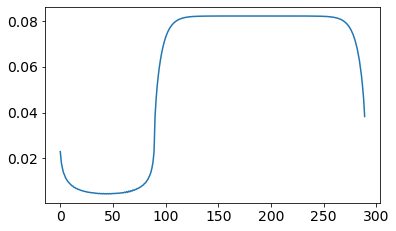

100%|██████████| 50/50 [03:07<00:00,  3.99s/it]

L = 144


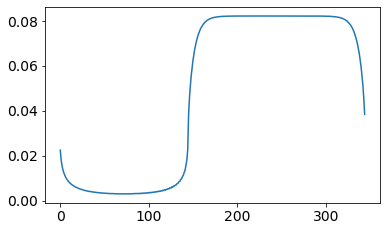

100%|██████████| 50/50 [04:59<00:00,  5.98s/it]

L = 233


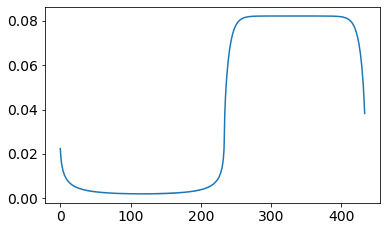

100%|██████████| 50/50 [09:15<00:00, 10.95s/it]

L = 377


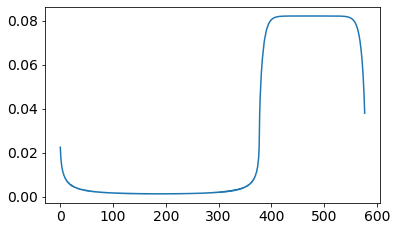

100%|██████████| 50/50 [16:58<00:00, 20.17s/it]

L = 610


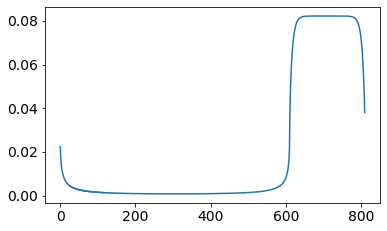

In [27]:
wqL = np.sqrt(987)*0.02
Ls = np.array([89, 144, 233, 377, 610])
ws = wqL/np.sqrt(Ls)

for (wt, L) in zip(ws, Ls):
    wt = wt
    L = L
    LSC = 199
    N_trials = 50
    Actual_Delta_mids = []

    Deltas = []
    for i in tqdm(range(N_trials)):
        chain = hybrid_ring (chain1D(L, wt =wt), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 4000)
        Deltas.append(np.real(chain.Delta))
        Actual_Delta_mids.append(np.real(chain.Delta[L//2]))
    
    print("L = {}".format(L))
    Delta_avg = np.sum(np.array(Deltas), axis = 0)/N_trials

    plt.plot(Delta_avg)
    plt.show()
    
    comp_dis_test[(L,wqL)] = Deltas

In [28]:
pickle.dump(comp_dis_test, open("comp_dis_rs.p","wb"))

## Disordered

In [65]:
comp_dis = pickle.load(open("comp_dis.p","rb"))
keys = sorted(comp_dis.keys())
[print((key, len(comp_dis[key]))) for key in keys]

L = Fibonacci[10]
wt = 0.03
print(L, len(comp_dis[L,wt]))
LSC = 199

((55, 0.005), 500)
((55, 0.05), 500)
((55, 0.25), 500)
((89, 0.0001), 500)
((89, 0.002), 1500)
((89, 0.003), 2281)
((89, 0.005), 5000)
((89, 0.0075), 2000)
((89, 0.01), 9000)
((89, 0.0125), 5000)
((89, 0.015), 4500)
((89, 0.0175), 3020)
((89, 0.02), 8000)
((89, 0.025), 4000)
((89, 0.03), 8000)
((89, 0.04), 5664)
((89, 0.05), 4000)
((89, 0.06), 4000)
((89, 0.1), 4000)
((89, 0.12), 1500)
((89, 0.15), 2500)
((89, 0.2), 4000)
((89, 0.25), 500)
((89, 0.3), 4000)
((89, 0.35), 500)
((89, 0.4), 4000)
((89, 0.7), 1900)
((144, 0.005), 100)
((144, 0.02), 50)
((144, 0.05), 500)
((144, 0.25), 500)
((144, 0.4), 500)
((144, 0.7), 1051)
((233, 0.005), 100)
((233, 0.02), 500)
((233, 0.03), 100)
((233, 0.04), 100)
((233, 0.05), 500)
((233, 0.25), 500)
((233, 0.4), 500)
((233, 0.7), 750)
((377, 0.005), 100)
((377, 0.02), 100)
((377, 0.03), 100)
((377, 0.04), 100)
((377, 0.05), 600)
((377, 0.1), 100)
((377, 0.25), 500)
((377, 0.4), 100)
((377, 0.7), 300)
((610, 0.005), 100)
((610, 0.03), 50)
((610, 0.25),

KeyError: (144, 0.03)

100%|██████████| 50/50 [02:49<00:00,  3.43s/it]


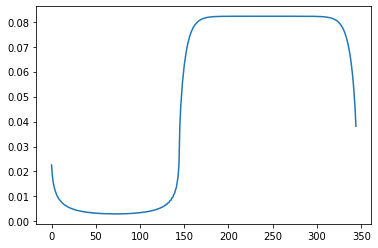

In [66]:
N_trials = 50
Actual_Delta_mids = []

Deltas = []
for i in tqdm(range(N_trials)):
    chain = hybrid_ring (chain1D(L, wt =wt), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 4000)
    Deltas.append(np.real(chain.Delta))
    Actual_Delta_mids.append(np.real(chain.Delta[L//2]))

Delta_avg = np.sum(np.array(Deltas), axis = 0)/N_trials

plt.plot(Delta_avg)
plt.show()

In [67]:
comp_dis[(L,wt)] = Deltas

In [57]:
# temp = comp_dis[(L,wt)] + Deltas
# comp_dis[(L,wt)] = temp

In [68]:
pickle.dump(comp_dis,open("comp_dis.p","wb"))

## Fibonacci case

In [7]:
comp_FC = pickle.load(open("comp_FC.p","rb"))
[print((key, len(comp_FC[key]))) for key in comp_FC.keys()]
/

((89, 0.1), 89)
((89, 0.05), 89)
((89, 0.2), 89)
((89, 0.15), 89)
((89, 0.3), 89)
((144, 0.05), 144)
((144, 0.1), 144)
((144, 0.2), 144)
((144, 0.3), 144)
((144, 0.01), 144)
((233, 0.1), 233)
((233, 0.2), 233)
((233, 0.3), 233)
((233, 0.15), 233)
((233, 0.25), 233)
((89, 0.25), 89)
((144, 0.25), 144)
((377, 0.25), 377)
((610, 0.25), 610)
((610, 0.3), 610)
((987, 0.25), 987)
((987, 0.1), 987)
((377, 0.1), 377)
((610, 0.1), 610)
((89, 0.5), 89)
((377, 0.5), 377)
((233, 0.5), 233)
((144, 0.5), 144)
((610, 0.5), 610)
((377, 0.3), 377)
((610, 0.05), 610)
((377, 0.05), 377)
((233, 0.05), 233)
((377, 0.15), 377)
((377, 0.2), 377)
((610, 0.2), 610)
((610, 0.15), 610)


()

  0%|          | 0/505 [00:00<?, ?it/s]/Users/gautam/Dropbox/Notebooks/proximitylib.py:35: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(beta*eps))
100%|██████████| 505/505 [2:40:02<00:00, 19.01s/it]  


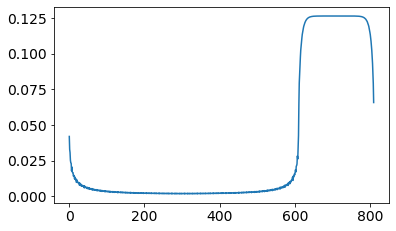

In [4]:
n = 13
L = Fibonacci[n]
LSC = 199
w = 0.15
N_trials = L
Actual_Delta_mids = []



Deltas = {}
for i in tqdm(range(105,N_trials)):
    chain = hybrid_ring (chainFC(n, w = w, phi = i), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 2000)
    Deltas[2*np.pi*i/N_trials] = np.real(chain.Delta)
    Actual_Delta_mids.append(np.real(chain.Delta[L//2]))

Delta_avg = np.ones(L+1+1+LSC)
for Delta in Deltas.values():
    Delta_avg *= Delta**(1/N_trials)

plt.plot(Delta_avg)
plt.show()

In [5]:
temp = {**comp_FC[(L,w)],**Deltas}
comp_FC[(L,w)] = temp

In [5]:
# comp_FC[(L,w)] = Deltas

In [6]:
pickle.dump(comp_FC,open("comp_FC.p","wb"))

## AAH case

In [71]:
comp_AAH = pickle.load(open("comp_AAH.p","rb"))
[print((key, len(comp_AAH[key]))) for key in comp_AAH.keys()]
\

((89, 2.0), 89)
((144, 2.0), 144)
((233, 2.0), 233)
((610, 2.0), 610)
((377, 2.0), 377)
((987, 2.0), 120)


[None, None, None, None, None, None]




  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:44<14:13, 44.94s/it]


 10%|█         | 2/20 [01:31<13:38, 45.46s/it]


 15%|█▌        | 3/20 [02:19<13:05, 46.20s/it]


 20%|██        | 4/20 [03:04<12:14, 45.92s/it]


 25%|██▌       | 5/20 [03:50<11:29, 45.96s/it]


 30%|███       | 6/20 [04:41<11:04, 47.49s/it]


 35%|███▌      | 7/20 [05:32<10:30, 48.53s/it]


 40%|████      | 8/20 [06:26<10:00, 50.08s/it]


 45%|████▌     | 9/20 [07:20<09:24, 51.30s/it]


 50%|█████     | 10/20 [08:10<08:28, 50.82s/it]


 55%|█████▌    | 11/20 [09:00<07:36, 50.71s/it]


 60%|██████    | 12/20 [09:50<06:43, 50.38s/it]


 65%|██████▌   | 13/20 [10:40<05:51, 50.21s/it]


 70%|███████   | 14/20 [11:30<05:00, 50.07s/it]


 75%|███████▌  | 15/20 [12:20<04:10, 50.05s/it]


 80%|████████  | 16/20 [13:09<03:19, 49.88s/it]


 85%|████████▌ | 17/20 [13:59<02:29, 49.88s/it]


 90%|█████████ | 18/20 [14:49<01:40, 50.02s/it]


 95%|█████████▌| 19/20 [15:38<00:49, 49.74s/it]


100%|██████████

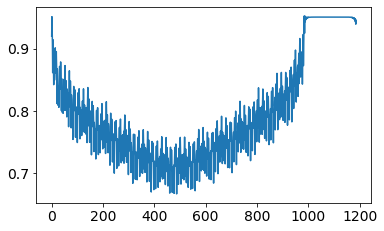

In [68]:
n = 14
L = Fibonacci[n]
LSC = 199
w = 2.0

f = 1
N_trials = f*L
phis = np.arange(100,120)*2*np.pi/N_trials
# phis = np.arange(N_trials)[1::2]*2*np.pi/N_trials


Deltas = {}
for phi in tqdm(phis):
    chain = hybrid_ring (chainAAH(n, wu = w, phi = phi), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 10000)
    Deltas[phi] = np.real(chain.Delta)

Delta_avg = np.ones(L+1+LSC)
for Delta in Deltas.values():
    Delta_avg *= Delta**(1/N_trials)

plt.plot(Delta_avg)
plt.show()

In [69]:
temp = {**comp_AAH[(L,w)],**Deltas}
comp_AAH[(L,w)] = temp

In [66]:
# comp_AAH[(L,w)] = Deltas

In [70]:
pickle.dump(comp_AAH,open("comp_AAH.p","wb"))

### Disordered diagonal

In [4]:
comp_disdiag = pickle.load(open("comp_disdiag.p","rb"))
[print((key, len(comp_disdiag[key]))) for key in sorted(comp_disdiag.keys())]

L = Fibonacci[15]
wu = 0.5
LSC = 199

((89, 0.005), 1051)
((89, 0.25), 1550)
((89, 0.4), 2500)
((89, 0.5), 500)
((89, 0.8), 500)
((89, 2.0), 50)
((144, 0.005), 50)
((144, 0.25), 50)
((144, 0.8), 50)
((144, 2.0), 50)
((233, 0.005), 50)
((233, 0.25), 50)
((233, 0.5), 100)
((233, 0.8), 50)
((233, 2.0), 50)
((377, 0.005), 50)
((377, 0.25), 50)
((377, 0.5), 100)
((377, 0.8), 50)
((377, 2.0), 50)
((610, 0.005), 50)
((610, 0.25), 25)
((610, 0.5), 100)
((610, 0.8), 50)
((610, 2.0), 25)
((987, 0.005), 25)
((987, 0.25), 10)
((987, 0.5), 25)
((987, 0.8), 25)
((987, 2.0), 10)
((1597, 0.005), 10)
((1597, 0.25), 20)
((1597, 0.8), 10)
((2584, 0.8), 2)


100%|██████████| 10/10 [31:11<00:00, 187.33s/it]


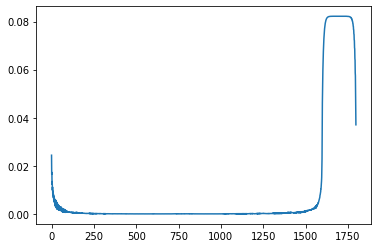

In [5]:
N_trials = 10
Actual_Delta_mids = []

Deltas = []
for i in tqdm(range(N_trials)):
    chain = hybrid_ring (chain1D(L, wu =wu), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 4000)
    Deltas.append(np.real(chain.Delta))
    Actual_Delta_mids.append(np.real(chain.Delta[L//2]))

Delta_avg = np.sum(np.array(Deltas), axis = 0)/N_trials

plt.plot(Delta_avg)
plt.show()

In [32]:
# temp = comp_disdiag[(L,wu)] + Deltas
# comp_disdiag[(L,wu)] = temp

In [6]:
comp_disdiag[(L,wu)] = Deltas

In [7]:
pickle.dump(comp_disdiag,open("comp_disdiag.p","wb"))

## Periodic case

In [ ]:
############ Finite size scaling for the periodic case
Deltas = {}
Delta_mids = []
Lengths = [55, 89, 144, 233, 377, 610, 987]
beta = 20
for L in Lengths:
    chain = hybrid_ring (chain1D(L), chain1D(199,u = 0.75, v=-1.5), t_int = -1, beta = beta)
    plt.plot(chain.Delta)
    plt.show()
    Delta_mids.append(chain.Delta[(L+1)//2])
    Deltas[(beta,L)] = chain.Delta
#plt.plot(Lengths, Delta_mids,".")

temp = scaling(np.array(Lengths)/2, np.array(Delta_mids))

# temp.fit_to_pow()
# temp.fit_to_exp()
# temp.fit_to_expstr()